<p Style= "text-align: right"> 14/12/2023 </p>

<img src = "Bank_Loans.jpg">
<h2 Style = "color:#B8860B; text-align: center" > Proyecto Machine Learning: Análisis Banco Uno  </h2>

<p> A través de este proyecto se pretende realizar la aplicación de los contenidos observados durante el desarrollo del curso de Machine Learning. </p>

<p Style = "text-align: justify"> En este caso se pretende diseñar e implementar una solución mediante la cual se facilite la toma de decisiones respecto a al proceso de otorgamiento de créditos del Banco Uno. </p>

<h3 Style = "text-align: center; font-weight: bold; color: #191970" > Objetivos del Proyecto: </h3>

<ol>
    <li> Explorar el set de datos que proporcionará la entidad bancaria.
    <li> Diseñar los algoritmos de machine learning.
    <li> Preparar los modelos que se estimen necesarios para el respectivo análisis.
    <li> Lograr determinar los créditos que deben ser otorgados o no a los clientes.   
<ol>
</p>

</br>

<p Style = 'text-align: right'>

<h3 Style = "color: #D2B48C"> 1. Carga y Transformación del Set de Datos</h3>


In [1]:
# Carga de librerias que se utilizaran en el proyecto
from sqlalchemy import create_engine
import pymysql
import pandas as pd 
%matplotlib notebook
import matplotlib.pyplot as plt
import ydata_profiling as pandas_profiling
import numpy as np
import seaborn as sns

In [2]:
# Carga y conexión con la base de datos.
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [3]:
df = pd.read_sql('SELECT * FROM credit', con=connection)

C:\Users\danie\AppData\Local\Temp\ipykernel_34668\3787531507.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM credit', con=connection)


In [4]:
df. to_csv ( 'BancoUno.csv' , header = False , index = False )

In [5]:
# Dataframe
credit = df

In [6]:
credit.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
6,50000,male,graduate school,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default
7,500000,male,graduate school,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
8,100000,female,university,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,not default
9,140000,female,high school,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,not default


In [7]:
credit.shape

(3670, 24)

In [8]:
credit.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670,...,3670,3670,3670,3670,3670,3670,3670,3670,3670,3670
unique,63,3,5,5,53,10,11,11,10,9,...,2009,1984,1948,1147,1130,1041,1035,1039,971,3
top,50000,female,university,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,not default
freq,453,2130,1644,2045,214,1741,1901,1875,1995,1996,...,424,460,532,667,708,798,808,827,949,2873


In [9]:
# EDA
#pandas_profiling.ProfileReport(credit)

In [10]:
# Como se puede observar, existen 24 variables categoricas conformadas por 3 mil observaciones, 
# asi como la existencia de duplicados.

In [11]:
credit.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [12]:
# Cambio del nombre de columnas del primer dataset para ajustarlas a buenas practicas
credit.rename({'X1':'limit_bal'}, axis=1, inplace=True)
credit.rename({'X2':'sex'}, axis=1, inplace=True)
credit.rename({'X3':'education'}, axis=1, inplace=True)
credit.rename({'X4':'marriage'}, axis=1, inplace=True)
credit.rename({'X5':'age'}, axis=1, inplace=True)
credit.rename({'X6':'pay_0'}, axis=1, inplace=True)
credit.rename({'X7':'pay_2'}, axis=1, inplace=True)
credit.rename({'X8':'pay_3'}, axis=1, inplace=True)
credit.rename({'X9':'pay_4'}, axis=1, inplace=True)
credit.rename({'X10':'pay_5'}, axis=1, inplace=True)
credit.rename({'X11':'pay_6'}, axis=1, inplace=True)
credit.rename({'X12':'bill_amt1'}, axis=1, inplace=True)
credit.rename({'X13':'bill_amt2'}, axis=1, inplace=True)
credit.rename({'X14':'bill_amt3'}, axis=1, inplace=True)
credit.rename({'X15':'bill_amt4'}, axis=1, inplace=True)
credit.rename({'X16':'bill_amt5'}, axis=1, inplace=True)
credit.rename({'X17':'bill_amt6'}, axis=1, inplace=True)
credit.rename({'X18':'pay_amt1'}, axis=1, inplace=True)
credit.rename({'X19':'pay_amt2'}, axis=1, inplace=True)
credit.rename({'X20':'pay_amt3'}, axis=1, inplace=True)
credit.rename({'X21':'pay_amt4'}, axis=1, inplace=True)
credit.rename({'X22':'pay_amt5'}, axis=1, inplace=True)
credit.rename({'X23':'pay_amt6'}, axis=1, inplace=True)
credit.rename({'Y':'default_payment_nexth_month'}, axis=1, inplace=True)

In [13]:
credit.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_nexth_month'],
      dtype='object')

In [14]:
# Como en el EDA se identificaron valores duplicados, se procede a eliminarlos.
credit.drop_duplicates(keep='first', inplace=True)

In [15]:
# Ajuste del encabezado del set de datos.
credit.drop(0, inplace=True)
credit.reset_index(drop =True, inplace =True)

In [16]:
credit.head(5)

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_nexth_month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


<h3 Style = "color: #D2B48C"> 2. Respecto a Valores Faltantes </h3>

In [17]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   limit_bal                    2396 non-null   object
 1   sex                          2396 non-null   object
 2   education                    2396 non-null   object
 3   marriage                     2396 non-null   object
 4   age                          2396 non-null   object
 5   pay_0                        2396 non-null   object
 6   pay_2                        2396 non-null   object
 7   pay_3                        2396 non-null   object
 8   pay_4                        2396 non-null   object
 9   pay_5                        2396 non-null   object
 10  pay_6                        2396 non-null   object
 11  bill_amt1                    2396 non-null   object
 12  bill_amt2                    2396 non-null   object
 13  bill_amt3                    2396

In [18]:
# De acuerdo a lo anterior, el set de datos no tiene valores faltantes. 

<h3 Style = "color: #D2B48C"> 3. Estandarizacion de Datos </h3>

In [19]:
credit.dtypes

limit_bal                      object
sex                            object
education                      object
marriage                       object
age                            object
pay_0                          object
pay_2                          object
pay_3                          object
pay_4                          object
pay_5                          object
pay_6                          object
bill_amt1                      object
bill_amt2                      object
bill_amt3                      object
bill_amt4                      object
bill_amt5                      object
bill_amt6                      object
pay_amt1                       object
pay_amt2                       object
pay_amt3                       object
pay_amt4                       object
pay_amt5                       object
pay_amt6                       object
default_payment_nexth_month    object
dtype: object

In [20]:
# Para convertir el tipo de dato a "int"
 
credit[["limit_bal", "age", "pay_0", "pay_2", 'pay_3','pay_4','pay_5', 'pay_6', 'bill_amt1', 
        'bill_amt2', 'bill_amt3','bill_amt4','bill_amt5','bill_amt6', 'pay_amt1','pay_amt2',
       'pay_amt3','pay_amt4','pay_amt5', 'pay_amt6']] = credit[["limit_bal", "age", "pay_0", "pay_2", 'pay_3','pay_4','pay_5', 'pay_6', 'bill_amt1', 
        'bill_amt2', 'bill_amt3','bill_amt4','bill_amt5','bill_amt6', 'pay_amt1','pay_amt2',
       'pay_amt3','pay_amt4','pay_amt5', 'pay_amt6']].astype ("int")

In [21]:
credit.dtypes

limit_bal                       int32
sex                            object
education                      object
marriage                       object
age                             int32
pay_0                           int32
pay_2                           int32
pay_3                           int32
pay_4                           int32
pay_5                           int32
pay_6                           int32
bill_amt1                       int32
bill_amt2                       int32
bill_amt3                       int32
bill_amt4                       int32
bill_amt5                       int32
bill_amt6                       int32
pay_amt1                        int32
pay_amt2                        int32
pay_amt3                        int32
pay_amt4                        int32
pay_amt5                        int32
pay_amt6                        int32
default_payment_nexth_month    object
dtype: object

In [22]:
# El cambio de variable se ha realizado exitosamente. Solo 3 variables son de tipo objecto. 

In [23]:
# Se procede a realizar un análisis de las variables objeto.

<h3 Style = "color: #D2B48C"> 4. Análisis de Datos </h3>

In [24]:
gf = credit.groupby(['sex']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('limit_bal', ascending=False)
gf

,limit_bal
sex,
female,1384
male,1012


<IPython.core.display.Javascript object>


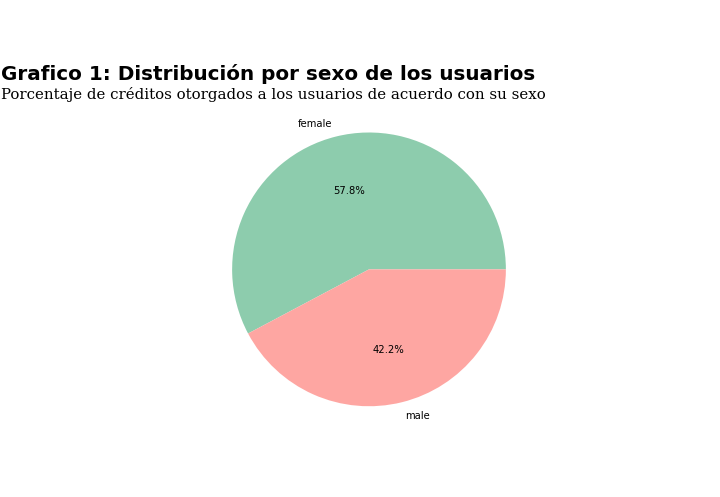

In [25]:
fig, ax = plt.subplots(1,1, figsize =(10,6.9), dpi=80)

 
eje_x = gf.index.tolist()
data = gf["limit_bal"].tolist()
 
bar_colors = ['#8dccad', '#fea6a2']

 
ax.pie(data, labels=eje_x, colors = bar_colors, autopct='%1.1f%%')

 
#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
 
title = "Grafico 1: Distribución por sexo de los usuarios"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")
 
#FORMATO DEL SUBTITULO
subTitle = "Porcentaje de créditos otorgados a los usuarios de acuerdo con su sexo"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")
 
#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 
plt.show()

In [26]:
gf = credit.groupby(['education']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('limit_bal', ascending=False)
gf

,limit_bal
education,
university,1077
graduate school,909
high school,392
other,18


<IPython.core.display.Javascript object>


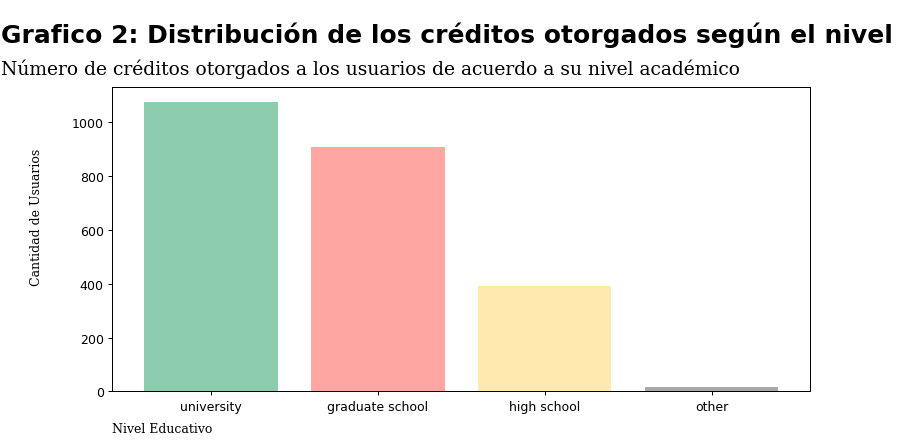

In [27]:
fig, ax = plt.subplots(1,1, figsize =(10,4.9), dpi=100)


eje_x = gf.index.tolist()
data = gf["limit_bal"].tolist()

bar_colors = ['#8dccad', '#fea6a2', '#ffe9af', '#A9A9A9']

ax.bar(eje_x, data, color=bar_colors)


title = "Grafico 2: Distribución de los créditos otorgados según el nivel educativo de los usuarios"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.95,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")
 
subTitle = "Número de créditos otorgados a los usuarios de acuerdo a su nivel académico"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.83,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

etiqueta = "Nivel Educativo"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")
 
etiquetay = "Cantidad de Usuarios"
ax.set_ylabel(etiquetay,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")


ax.xaxis.set_label_coords(x= 0, y=-0.10, transform = ax.transAxes)
ax.yaxis.set_label_coords(x=-0.10, y=0.35, transform = ax.transAxes)


ax.tick_params(axis='both', labelsize = 10)
 

plt.subplots_adjust(top = 0.80)
 

plt.show()

In [28]:
# Las personas con mayor educación son las que tienen un mayor acceso a crédito. 

In [29]:
gf = credit.groupby(['marriage']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('limit_bal', ascending=False)
gf

,limit_bal
marriage,
2,1330
1,1027
3,33
0,6


<IPython.core.display.Javascript object>


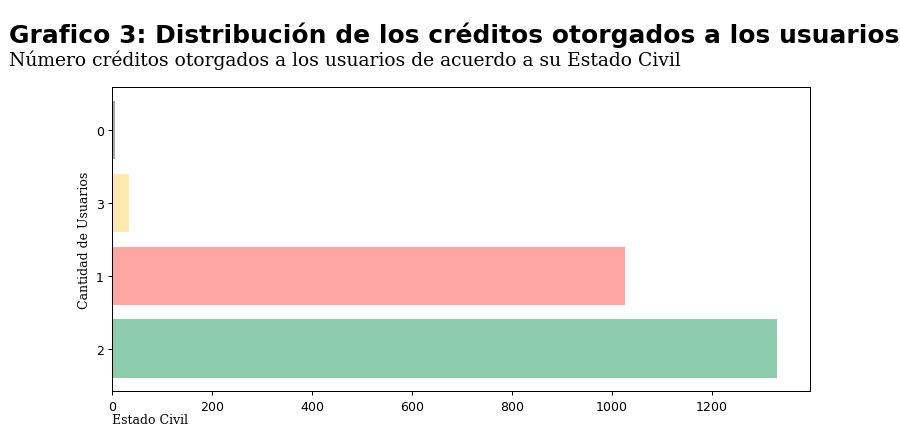

In [30]:
fig, ax = plt.subplots(1,1, figsize =(10,4.9), dpi=100)

 
eje_x = gf.index.tolist()
data = gf["limit_bal"].tolist()


bar_colors = ['#8dccad', '#fea6a2', '#ffe9af', '#A9A9A9']


ax.barh(eje_x, data, color=bar_colors)


 
title = "Grafico 3: Distribución de los créditos otorgados a los usuarios según su Estado Civil"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.01,
             y = 0.95,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "Liberation Sans Narrow")


#FORMATO DEL SUBTITULO
subTitle = "Número créditos otorgados a los usuarios de acuerdo a su Estado Civil"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.01,
             y = 0.85,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 
#FORMATO AL EJE (X/Y)
etiqueta = "Estado Civil"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

etiquetay = "Cantidad de Usuarios"
ax.set_ylabel(etiquetay,
              ha = 'center',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 
ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 
#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)

 
#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)
 

plt.show()

In [31]:
# Interpretación de Gráfico de Estado Civil: (1 = casado; 2 = soltero; 3 = divorciado; 0 = otros).

# Los solteros y los casados son los grupos que tienen los mayores niveles de endeudamiento. 

<IPython.core.display.Javascript object>


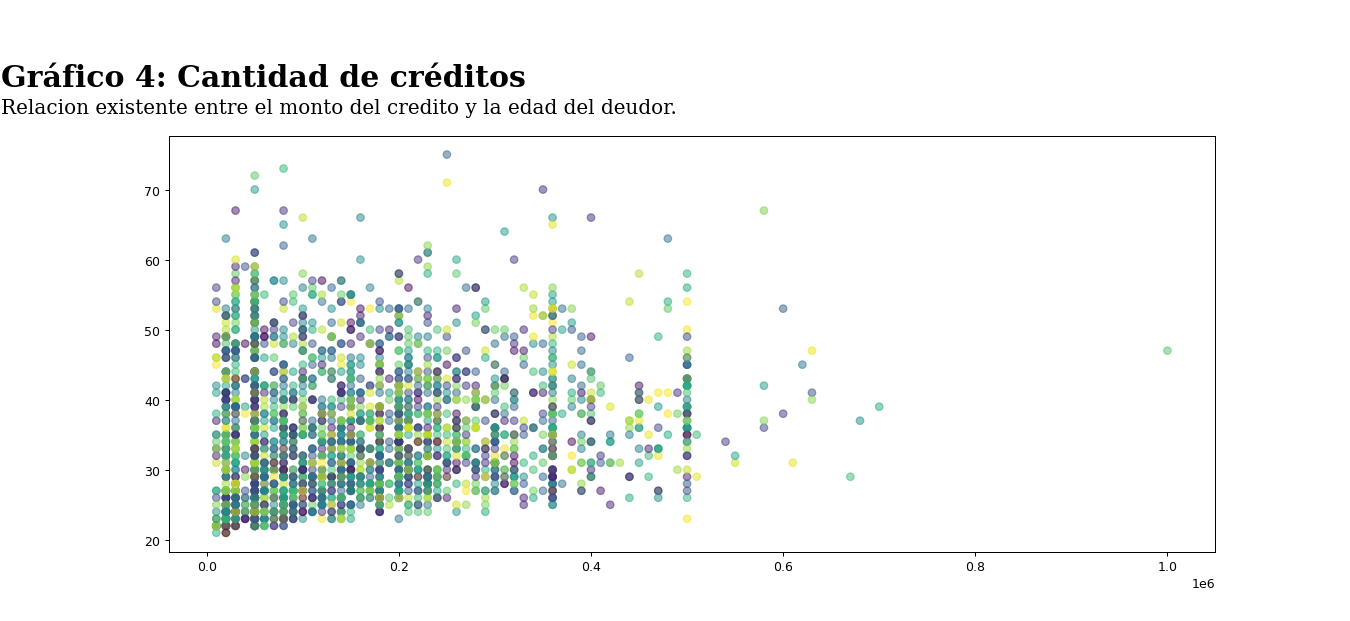

In [32]:
fig,ax=plt.subplots(1,1,figsize=(15,6.9),dpi=100)

colors = np.random.rand(2396)
ax.scatter(credit['limit_bal'],credit['age'],  c=colors, alpha=0.5)

#Formato del grafico
#-------Titulo y Subtitulo del grafico
title_t = "Gráfico 4: Cantidad de créditos"
ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.001,
             y=0.86,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")

subtitle_t = 'Relacion existente entre el monto del credito y la edad del deudor.'
plt.suptitle(subtitle_t,
            horizontalalignment = "left",
            x = 0.001,
            y = 0.84,
            transform = fig.transFigure,
            fontsize=16,
            fontweight="regular",
            fontfamily="serif")


plt.subplots_adjust(top=0.78)

plt.show()

In [33]:
# El mayor número de crédito en la mayoría de grupos etáreos oscila de los 0 a los 200.000$

In [34]:
# Este código permite convertir los datos no numéricos a numéricos. 

In [35]:
header = credit.dtypes.index
print(header)

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_nexth_month'],
      dtype='object')


<IPython.core.display.Javascript object>


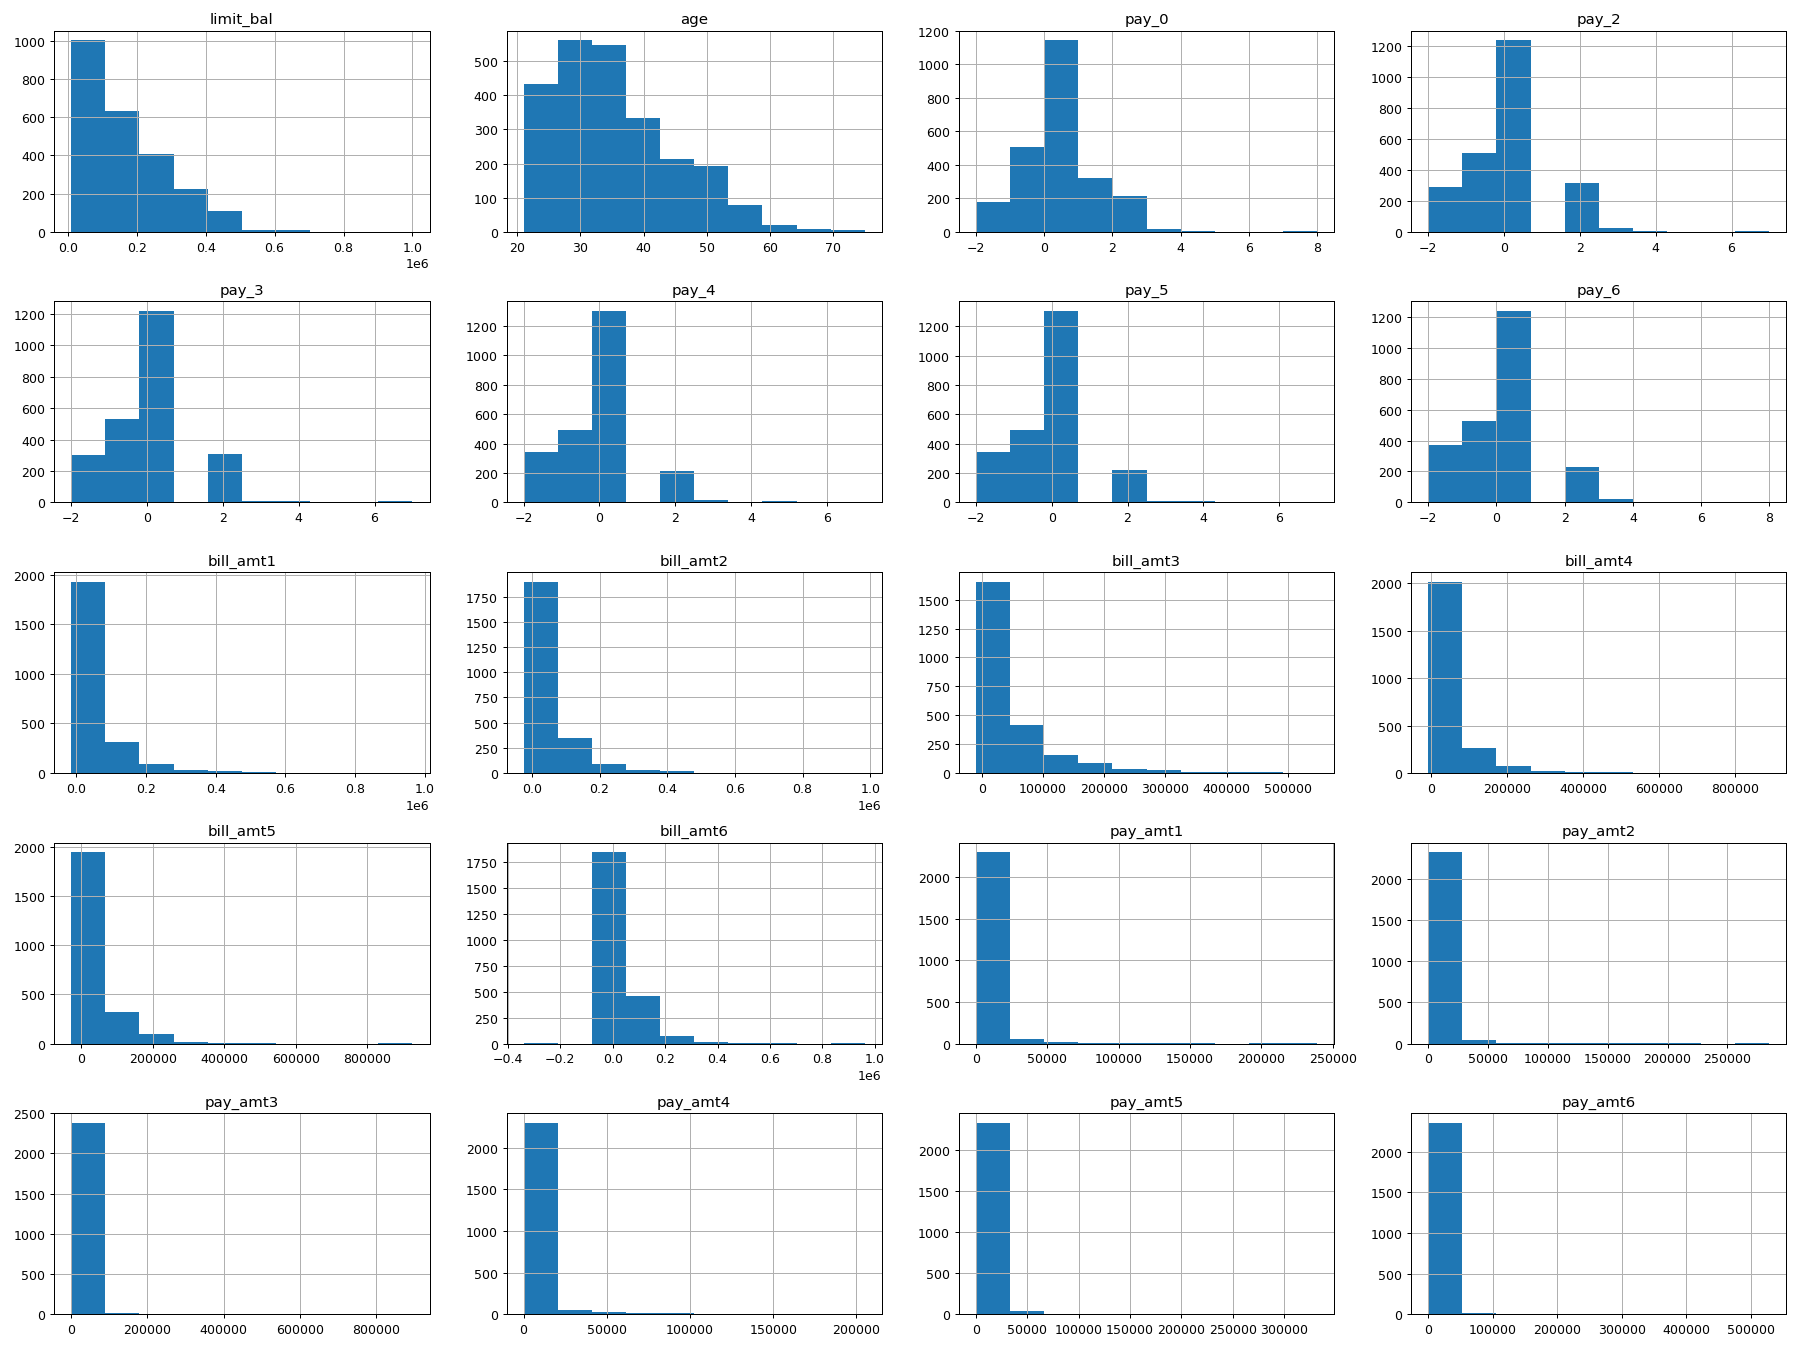

In [36]:
viz = credit[['limit_bal', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4',
       'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']]

num_bins = 10  

viz.hist(bins=num_bins, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [37]:
# Respecto a estos gráficos, podemos ver que para el de edad, el mayor grupo de edad al que se le otorgan créditos es al que va de los 25 a los 35 años de edad.
# Asi mismo vemos que la mayoría de créditos otorgados van de los 0 a los 200.000$

In [38]:
corrMat = credit.corr()
print(corrMat)

           limit_bal       age     pay_0     pay_2     pay_3     pay_4  \
limit_bal   1.000000  0.154974 -0.200540 -0.248233 -0.236194 -0.224340   
age         0.154974  1.000000 -0.017835 -0.029903 -0.037790 -0.024571   
pay_0      -0.200540 -0.017835  1.000000  0.637668  0.547805  0.497509   
pay_2      -0.248233 -0.029903  0.637668  1.000000  0.763806  0.667189   
pay_3      -0.236194 -0.037790  0.547805  0.763806  1.000000  0.812452   
pay_4      -0.224340 -0.024571  0.497509  0.667189  0.812452  1.000000   
pay_5      -0.213442 -0.012634  0.472577  0.639244  0.724154  0.835864   
pay_6      -0.210881 -0.009462  0.445626  0.606825  0.669614  0.742573   
bill_amt1   0.361823  0.068263  0.171638  0.225230  0.195056  0.200938   
bill_amt2   0.361342  0.061591  0.175226  0.229758  0.220140  0.221052   
bill_amt3   0.365711  0.065932  0.173459  0.232926  0.224046  0.253484   
bill_amt4   0.375659  0.058714  0.174051  0.229723  0.221919  0.249450   
bill_amt5   0.365777  0.052104  0.1808

C:\Users\danie\AppData\Local\Temp\ipykernel_34668\4264262329.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMat = credit.corr()


In [39]:
covMat = credit.cov()
print(covMat)

              limit_bal            age         pay_0         pay_2  \
limit_bal  1.676861e+10  189691.134493 -29175.023787 -38827.576232   
age        1.896911e+05      89.346812     -0.189402     -0.341421   
pay_0     -2.917502e+04      -0.189402      1.262192      0.865345   
pay_2     -3.882758e+04      -0.341421      0.865345      1.459028   
pay_3     -3.815289e+04      -0.445582      0.767712      1.150865   
pay_4     -3.417397e+04      -0.273211      0.657512      0.948026   
pay_5     -3.197111e+04      -0.138139      0.614136      0.893157   
pay_6     -3.227379e+04      -0.105708      0.591692      0.866280   
bill_amt1  3.648630e+09   50246.908772  15016.264546  21185.747455   
bill_amt2  3.532902e+09   43956.155322  14863.644606  20953.985093   
bill_amt3  3.297613e+09   43395.642119  13569.784507  19591.343794   
bill_amt4  3.313588e+09   37803.951152  13319.744428  18901.320245   
bill_amt5  3.046906e+09   31681.465104  13072.301012  18179.140215   
bill_amt6  3.022809e

C:\Users\danie\AppData\Local\Temp\ipykernel_34668\3199804705.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covMat = credit.cov()


<IPython.core.display.Javascript object>


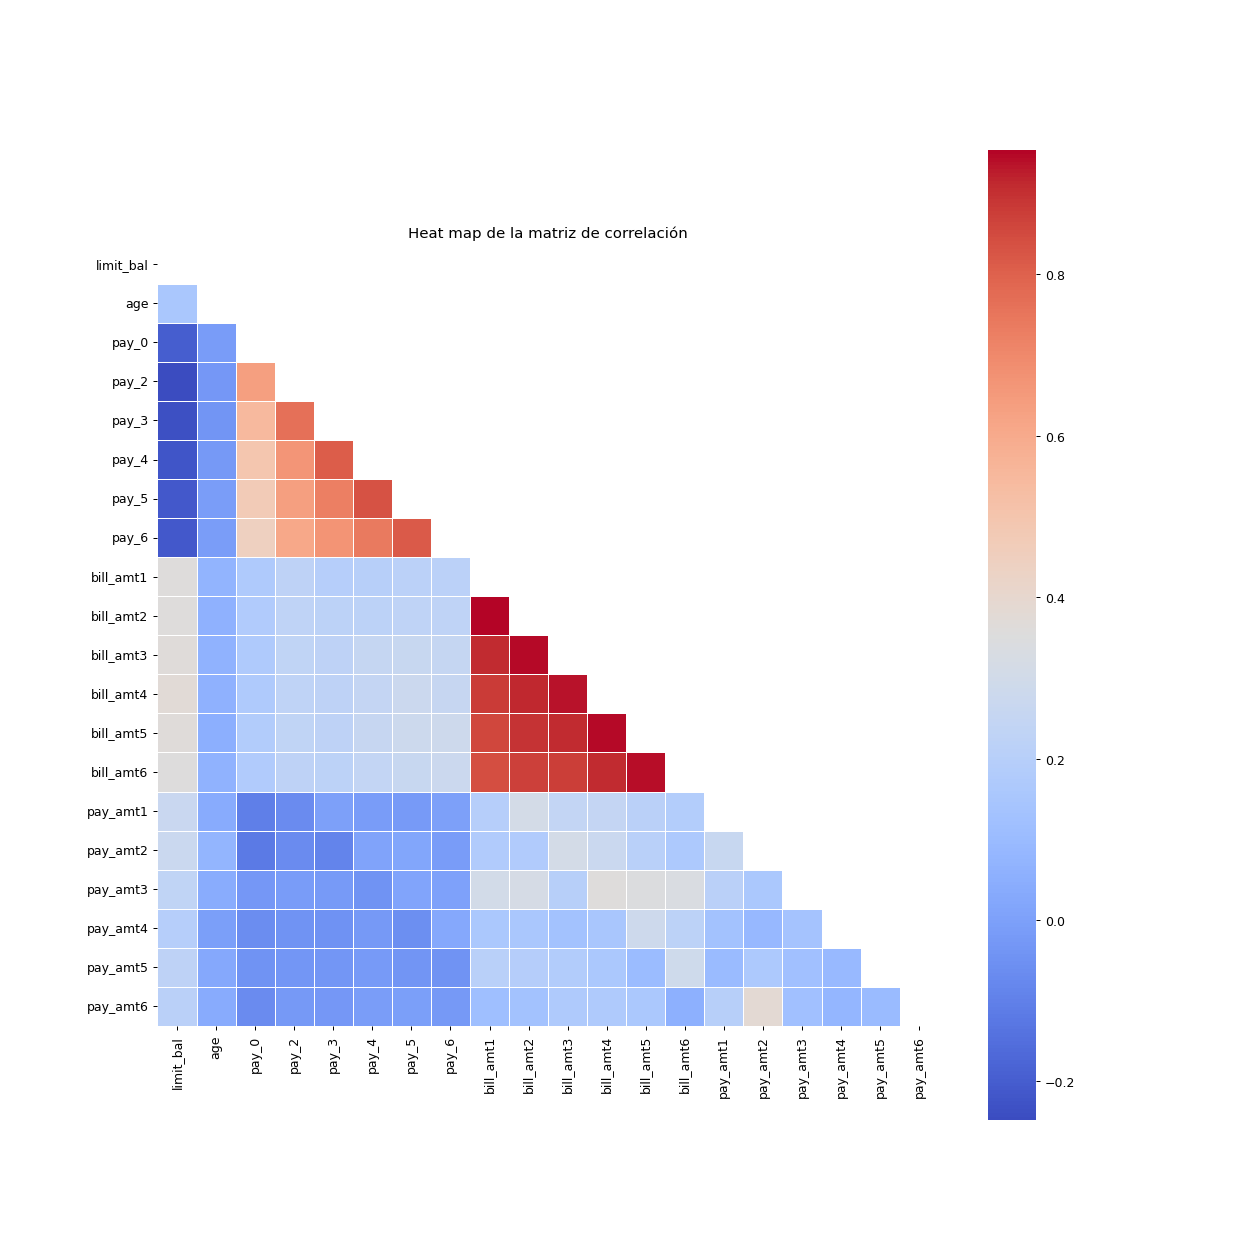

In [40]:
# Heat map de la matriz de correlación
mask = np.triu(np.ones_like(corrMat, dtype=bool))
plt.figure(figsize=(14, 14))
sns.heatmap(corrMat, mask=mask, annot=False, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Heat map de la matriz de correlación')
plt.yticks(rotation=0) 
plt.xticks(rotation=90)  
plt.show()

<h3 Style = "color: #D2B48C"> 5. Analisis Principal de Componentes (PCA) </h3>

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#El PCA solo funciona para variables numéricas, por lo que no se incluyen las variables categóricas.
features = ['limit_bal', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']

# Separating out the features
x = credit.loc[:, features].values

# Separating out the target
y = credit.loc[:,['default_payment_nexth_month']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

finalDf = pd.concat([principalDf, credit[['default_payment_nexth_month']]], axis = 1)

finalDf.head(10)

,principal_component_1,principal_component_2,default_payment_nexth_month
0,-1.870276,-0.761544,default
1,-0.767847,-2.018308,default
2,-0.832974,-0.968902,not default
3,-0.222349,-0.818026,not default
4,-0.713445,0.111711,not default
5,-0.213874,-0.812062,not default
6,13.819351,6.281657,not default
7,-1.785745,-0.355093,not default
8,-0.697256,-1.563441,not default
9,-2.741145,1.647152,not default


<IPython.core.display.Javascript object>


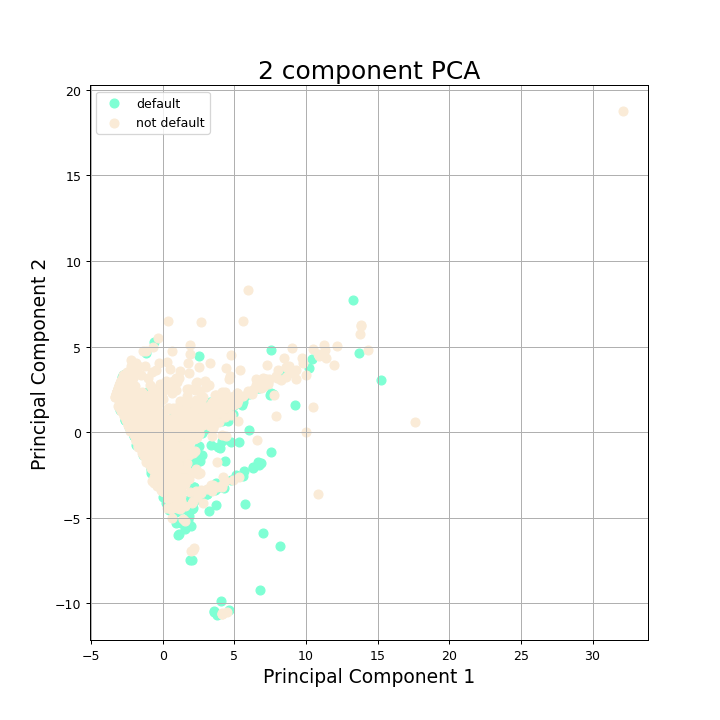

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
 
targets = ['default', 'not default']
colors = ['#7FFFD4','#FAEBD7']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['default_payment_nexth_month'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.3357123  0.20397228]


<IPython.core.display.Javascript object>


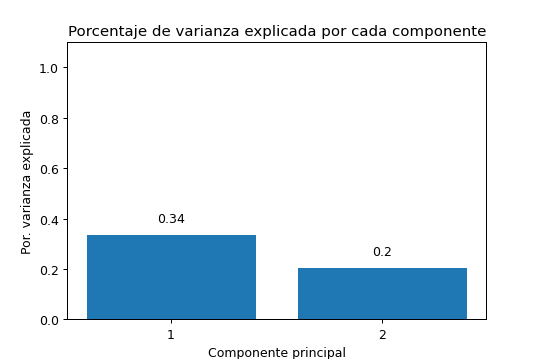

In [43]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)
 
for x, y in zip(np.arange(len(finalDf.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
 
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [44]:
#Interpretacion de los componentes: 

# Primer componente principal: Captura el 34% de la varianza total en los datos originales. 
# Esto significa que retiene una cantidad significativa de información, ya que una varianza del 34% es relativamente alta.

# Segundo componente principal: Captura el 20% de la varianza total. Aunque no retiene tanta información 
# como el primer componente, sigue siendo importante, ya que contribuye a explicar la variabilidad en los datos.

<h3 Style = "color: #D2B48C"> 6. Viabilidad del Modelo de Regresión Lineal  </h3>

De acuerdo a lo visto en el cursode Machine Learning, para la implementacion de un MRL simple o múltiple se debe contar con una variable dependiente en dominio numérico y consecutivo. 
En este sentido, si se tiene una variable dependiente de tip categórica, se debe aplicar un MRL Logistico ó un algoritmo de clasificación, esto porque la variable a predecir únicamente contiene dos posibles valores.

En resumen: con este set de datos NO es viable implementar un algorítmo de regresión lineal simple o múltiple. 

A continuación se procede a demostrar la no viabilidad del desarrollo del MRL Simple o MRL Multiple:

Se presentan dos grafica de dispercion para conocer la relacion que existe entre cada una de las variables independientes (componente 1 y componente 2) con la variable dependiente, lo que se busca es una distribución homogénea en los datos, por lo que si se dibuja una línea confirmaría la no viabilidad..

<IPython.core.display.Javascript object>


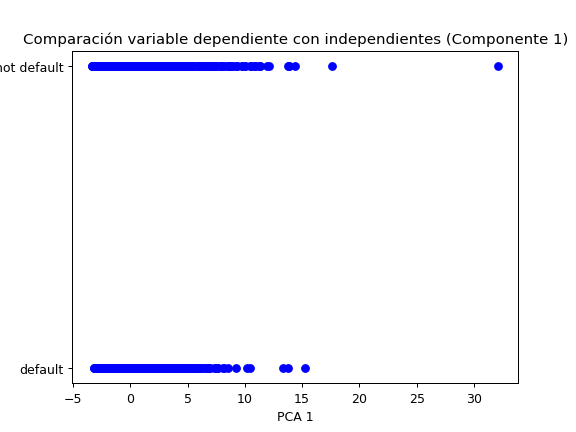

In [45]:
plt.figure()
plt.scatter(finalDf['principal_component_1'], finalDf['default_payment_nexth_month'], color='blue')
plt.xlabel("PCA 1")
plt.ylabel("default_payment_nexth_month")
plt.title("Comparación variable dependiente con independientes (Componente 1)")
plt.show()

<IPython.core.display.Javascript object>


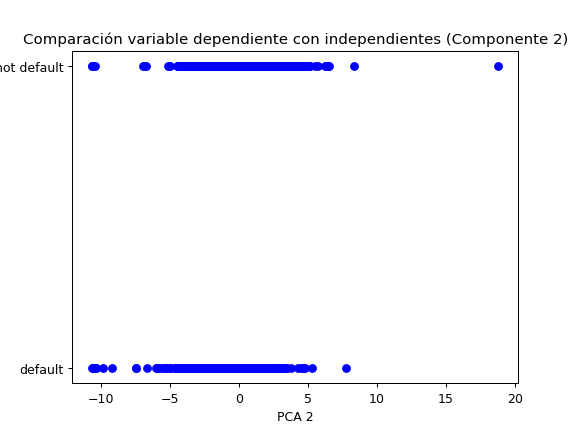

In [46]:
plt.figure()
plt.scatter(finalDf['principal_component_2'], finalDf['default_payment_nexth_month'], color='blue')
plt.xlabel("PCA 2")
plt.ylabel("default_payment_nexth_month")
plt.title("Comparación variable dependiente con independientes (Componente 2)")
plt.show()

<h3 Style = "color: #D2B48C"> 7. Conclusión del Proyecto  </h3>

De acuerdo a la comparación realizada, se visualiza que por la conformación de la variable dependiente, no es posible realizar la implementacion de alguno de los algoritmos de machine learning abordados durante el desarrollo del curso.
Razón por la cual hasta aquí llega el presente Proyecto. 